In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import webcolors

In [2]:
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("Image not found or cannot be opened.")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return image

In [3]:
def flatten_image(image):
    return image.reshape((image.shape[0] * image.shape[1], 3))

In [4]:
def perform_kmeans(image, num_colors):
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(image)
    return kmeans.cluster_centers_, kmeans.labels_

In [5]:
def count_cluster_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique, counts))

In [6]:
def get_dominant_colors(centers, cluster_frequency):
    sorted_centers = sorted(centers, key=lambda x: cluster_frequency[np.argwhere(np.all(centers == x, axis=1))[0][0]], reverse=True)
    return sorted_centers

In [7]:
def rgb_to_name(color_rgb):
    min_distance = float('inf')
    closest_name = None

    for name, hex_value in webcolors.CSS3_NAMES_TO_HEX.items():
        rgb = webcolors.hex_to_rgb(hex_value)
        r_diff = color_rgb[0] - int(rgb[0])
        g_diff = color_rgb[1] - int(rgb[1])
        b_diff = color_rgb[2] - int(rgb[2])
        distance = r_diff * r_diff + g_diff * g_diff + b_diff * b_diff

        if distance < min_distance:
            min_distance = distance
            closest_name = name

    return closest_name

In [8]:
def detect_colors(image_path, num_colors=5):
    image = load_image(image_path)
    flattened_image = flatten_image(image)
    centers, labels = perform_kmeans(flattened_image, num_colors)
    cluster_frequency = count_cluster_labels(labels)
    dominant_colors = get_dominant_colors(centers, cluster_frequency)
    
    color_names = [rgb_to_name(tuple(color.astype(int))) for color in dominant_colors]
    color_codes = [tuple(color.astype(int)) for color in dominant_colors]
    
    return color_names, color_codes, dominant_colors

C:\Users\Shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dominant colors:
darkslategray: (38, 57, 61) (RGB: [38 57 61])
silver: (204, 193, 186) (RGB: [204 193 186])
gray: (136, 124, 123) (RGB: [136 124 123])
steelblue: (70, 139, 214) (RGB: [ 70 139 214])
sienna: (191, 75, 36) (RGB: [191  75  36])


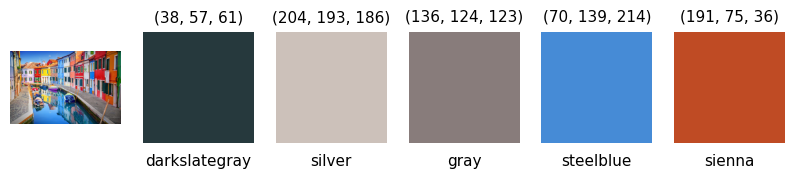

In [9]:
def display_colors(image, dominant_colors, color_names, color_codes):
    fig, axs = plt.subplots(1, len(dominant_colors) + 1, figsize=(10, 5))
    axs[0].imshow(image)
    axs[0].axis('off')

    for i, color in enumerate(dominant_colors):
        color_patch = np.zeros((100, 100, 3), dtype=np.uint8)
        color_patch[:, :] = color
        axs[i + 1].imshow(color_patch)
        axs[i + 1].axis('off')
        
        margin_top = 1.2  # Adjust the margin from the top
        margin_bottom = 1.1  # Adjust the margin from the bottom
        
        axs[i + 1].text(0.5, 1.0 - margin_top, f"{color_names[i]}", ha='center', fontsize=11, transform=axs[i + 1].transAxes)
        axs[i + 1].text(0.5, margin_bottom, f"{color_codes[i]}", ha='center', fontsize=11, transform=axs[i + 1].transAxes)

    plt.show()



image_path = "D:\Downloads\colorpic.jpg"
try:
    color_names, color_codes, dominant_colors = detect_colors(image_path)
    print("Dominant colors:")
    for name, code, color in zip(color_names, color_codes, dominant_colors):
        print(f"{name}: {code} (RGB: {np.array(color, dtype=int)})")

    image = load_image(image_path)
    display_colors(image, dominant_colors, color_names, color_codes)
except FileNotFoundError as e:
    print(e)
